In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

In [2]:
df = pd.read_csv('../Seed_Data.csv')[['A','LK','C']]
df.head()

,A,LK,C
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


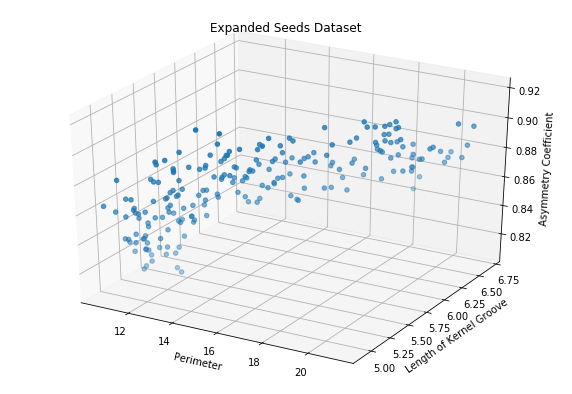

In [3]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # Where Axes3D is required
ax.scatter(df['A'], df['LK'], df['C'])
ax.set_xlabel('Perimeter')
ax.set_ylabel('Length of Kernel Groove')
ax.set_zlabel('Asymmetry Coefficient')
ax.set_title('Expanded Seeds Dataset')
plt.show()

In [4]:
model = PCA()

In [5]:
model.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
model.explained_variance_ratio_

array([9.97794495e-01, 2.19418709e-03, 1.13183333e-05])

In [7]:
model = PCA(n_components=1)

In [8]:
data_transformed = model.fit_transform(df.values)

In [9]:
data_restored = model.inverse_transform(data_transformed)

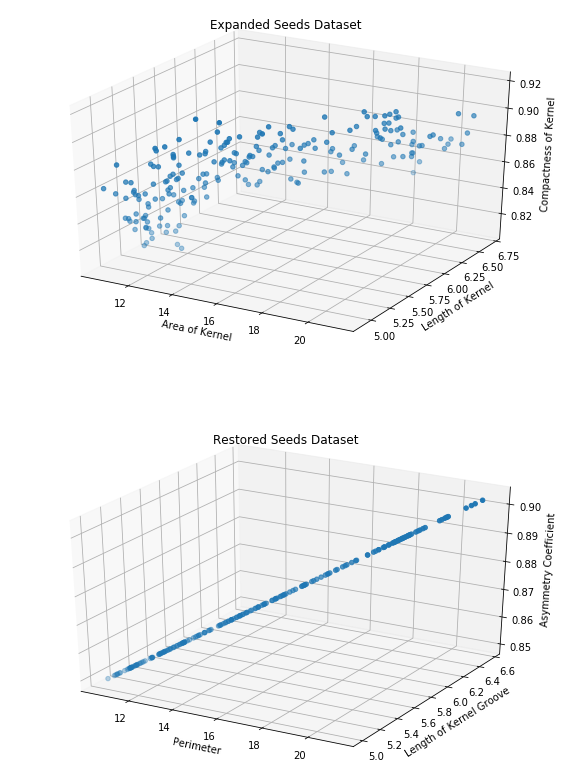

In [11]:
fig = plt.figure(figsize=(10, 14))

# Original Data
ax = fig.add_subplot(211, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'], label='Original Data')
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')

# Transformed Data
ax = fig.add_subplot(212, projection='3d')
ax.scatter(data_restored[:,0], data_restored[:,1], data_restored[:,2], label='Restored Data')
ax.set_xlabel('Perimeter')
ax.set_ylabel('Length of Kernel Groove')
ax.set_zlabel('Asymmetry Coefficient')
ax.set_title('Restored Seeds Dataset')
plt.show()